### Sprawozdanie - Minimalizacja funkcji
<div style="text-align: right"> Wojciech Kosztyła </div>


#### Zadanie 1 - Problem komiwojażera

Wygeneruj chmurę $n$ losowych punktów w 2D, a następnie zastosuj algorytm symulowanego wyżarzania
 do przybliżonego rozwiązania problemu komiwojażera dla tych punktów.

<br>

1. Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości $n$ oraz 3 różnych układów punktów w 2D
 - rozkład jednostajny,
 - rozkład normalny z czterema różnymi grupami parametrów,
 - dziewięc odseparowanych grup punktów).

<br>

2. Zbadaj wpływ sposobu generacji sąsiedniego stanu

 - <center>*consecutive swap* - zamiana kolejności losowej pary połączonych wierzchołków w ścieżce</center>

 <center>vs.</center>

 - <center>*arbitrary swap* - zamiana dwóch losowych wierzchołków w ścieżce)</center>

  oraz początkowej wartości temperatury na zbieżność procesu optymalizacji.

<br>

3. Przedstaw wizualizację działania procedury minimalizującej funkcję celu (funkcja przekazana do metody dual_annealing może modyfikować zewnętrzny stan)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Rozpocznę od stworzenia "chmury" losowych punktów w 2D.

In [2]:
def stworz_chmure(tryb, n):
    punkty = []

    if tryb == "rozklad_jednostajny":
        for i in range(n):
            wylosowana_kropka = np.random.uniform(-10.0, 10.0, size=2)
            punkty.append(wylosowana_kropka)


    elif tryb == "rozklad_normalny":    ## z podziałem na 4 parametry

        ilosc_parametrow = 4

        wartosc_oczekiwana = np.random.uniform(-10.0, 10.0, ilosc_parametrow)
        odchylenie_standardowe = np.random.uniform(0.68, 4.0, ilosc_parametrow)

        for i in range(ilosc_parametrow):
            poczatek_przedzialu = int( np.floor(i * n / ilosc_parametrow) )
            koniec_przedzialu   = int( np.floor((i+1) * n / ilosc_parametrow) - 1 )

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.normal(loc=wartosc_oczekiwana[i], scale=odchylenie_standardowe[i], size=2)
                punkty.append(wylosowana_kropka)

                iterator += 1


    else:   ## dziewięć odseparowanych grup punktów
        for i in range(9):
            poczatek_przedzialu = int( np.floor(i * n / 9) )
            koniec_przedzialu   = int( np.floor((i+1) * n / 9) - 1 )

            r = 5       # grupy rozkładam na kole o promieniu r
            kat = (i / 9) * (2 * np.pi)
            standardowy_x = r * np.cos(kat)     # punkt, wokół którego rozkładam grupę
            standardowy_y = r * np.sin(kat)

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.uniform(-1.0, 1.0, size=2)
                wylosowana_kropka[0] += standardowy_x
                wylosowana_kropka[1] += standardowy_y
                punkty.append(wylosowana_kropka)

                iterator += 1

    return punkty

>  - rozkład jednostajny,

Sprowadziło się do najzwyklejszego pobierania $n$ liczb z `numpy.random.uniform`.

>  - rozkład normalny z czterema różnymi grupami parametrów,

Najpierw wylosowałem losowe wartości parametrów dla rozkładu normalnego.

Następnie utworzyłem wzór, dzielący ciąg $n$ liczb na równe $+-1~$ przedziały (aby dla każdej pary parametrów przypasować taką samą ilość losowanych liczb).

Na przedziale $[poczatek przedzialu, koniecprzedzialu]$ losowałem odpowiednie dwójki z `numpy.random.normal`.

>  - dziewięc odseparowanych grup punktów).

Zamiast losowo ustawiać grupy punktów, postanowiłem ustawić je w kontrolowalny sposób - na okręgu.

Losowe ustawienie nie gwarantowałoby "separacji".

Dzielenie przedziału wykonałem jak w poprzednim podpunkcie.

Do wylosowanej wartości z rozkładu jednostajnego dodawałem koordynaty "punktu na okręgu".

In [3]:
print( stworz_chmure("rozklad_jednostajny", 28) )

[array([5.07972492, 7.4328892 ]), array([ 6.09227219, -5.98559916]), array([-2.20130039,  9.29938807]), array([ 2.59300067, -9.03766425]), array([9.53167907, 1.18734397]), array([ 8.85104297, -4.19833107]), array([-4.64208604, -0.26551388]), array([-7.53996874,  0.74604527]), array([-1.23731953, -2.91413959]), array([2.34595409, 6.61361228]), array([4.9488386, 3.4921155]), array([-3.56865747, -6.62247881]), array([2.62195556, 1.51735523]), array([-6.20144349, -1.35199887]), array([-6.15857344,  2.13622284]), array([-2.48907042, -9.79520393]), array([-1.85915774,  6.21385394]), array([5.69273322, 7.46627579]), array([ 1.98038562, -5.25618627]), array([-7.56806721,  4.08396896]), array([-0.392111  ,  5.27982405]), array([8.51859166, 4.40259352]), array([ 2.83206129, -6.15050538]), array([2.524524  , 5.95805729]), array([-3.02128837,  2.77757659]), array([4.83366458, 5.65860762]), array([-7.83912444, -6.5894281 ]), array([-7.88494539,  1.57942322])]


In [4]:
print( stworz_chmure("rozklad_normalny",  28) )

[array([6.75145932, 7.76902851]), array([5.80181641, 7.17682701]), array([4.4509896 , 1.20742689]), array([9.00292726, 7.11860152]), array([ 4.63749506, -0.75842805]), array([ 8.25279328, 10.04830873]), array([3.33051847, 6.12075201]), array([ 2.89873634, -0.65969504]), array([2.75772296, 5.07186683]), array([6.31321703, 5.67023586]), array([-0.09056596,  1.50448669]), array([1.7582384 , 0.46122867]), array([4.76120363, 6.43834549]), array([-0.19912474, -0.23549617]), array([-0.81743461, -1.09508746]), array([ 0.58921509, -0.32999426]), array([-0.99661447, -2.20545936]), array([-0.87688422, -0.44538958]), array([-0.86732353,  1.15881782]), array([-0.64244461,  0.23791892]), array([0.38465636, 0.78441788]), array([3.99891983, 2.49185969]), array([5.06111396, 3.29761201]), array([6.4225    , 8.34447268]), array([ 3.89979638, -0.3236174 ]), array([5.2740724 , 2.67273687]), array([4.36951816, 2.1254946 ]), array([6.77681639, 3.25079417])]


In [5]:
print( stworz_chmure("separacja", 28) )


[array([ 4.47432043, -0.98990015]), array([4.9799825 , 0.63901999]), array([ 4.330375  , -0.35037358]), array([3.01146094, 2.23046472]), array([3.29322592, 3.31506805]), array([3.77770207, 4.07603513]), array([0.88816554, 5.24666601]), array([1.50891187, 4.65135069]), array([-0.00569051,  4.64986832]), array([-2.35732695,  4.58594701]), array([-2.05706653,  5.21297365]), array([-2.97616799,  3.3863618 ]), array([-4.00800213,  2.28469516]), array([-5.25728546,  2.2433526 ]), array([-4.81643059,  2.15950204]), array([-4.80677868, -2.25265555]), array([-4.01368376, -1.41495176]), array([-3.78486349, -1.15313764]), array([-3.48724983, -4.11012595]), array([-2.19833459, -3.74199714]), array([-2.27952492, -4.54146853]), array([ 0.49604836, -5.60204394]), array([ 0.59769667, -4.17890678]), array([ 1.00428463, -4.67448756]), array([ 3.68309619, -3.60417381]), array([ 3.66163146, -4.03832392]), array([ 3.20996912, -3.20741397]), array([ 3.38455791, -3.51654423])]


Jak widzimy, dane w takiej postaci nie pozwalają nam stwierdzić, czy losowanie spełnia podane założenia.

Zaimplementuję więc wyświetlanie takich list macierzy.

In [6]:
def wyswietl_chmure(chmura, tytul="Chmura punktów"):
    fig1, axis = plt.subplots(figsize=(10,10))

    axis.set_title(tytul)
    axis.set_xlabel("x")
    axis.set_ylabel("y")

    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])

    fig1.tight_layout()
    fig1.show()

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


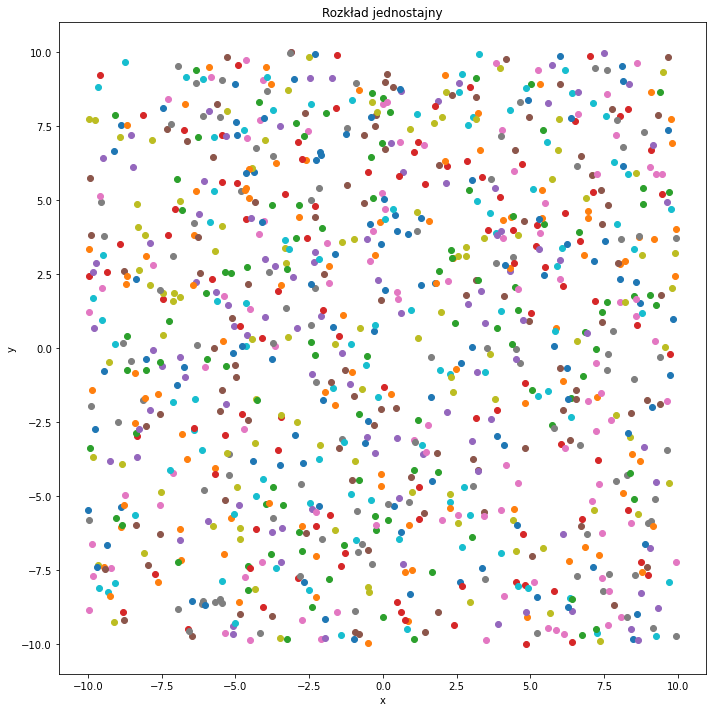

In [7]:
wyswietl_chmure( stworz_chmure("rozklad_jednostajny", 1000) , tytul="Rozkład jednostajny")

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


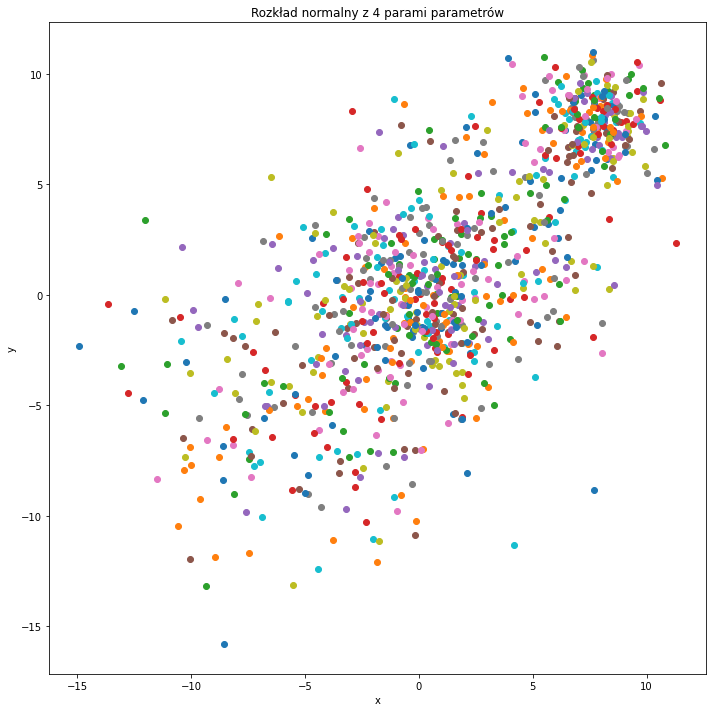

In [8]:
wyswietl_chmure( stworz_chmure("rozklad_normalny", 1000) , tytul="Rozkład normalny z 4 parami parametrów" )

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


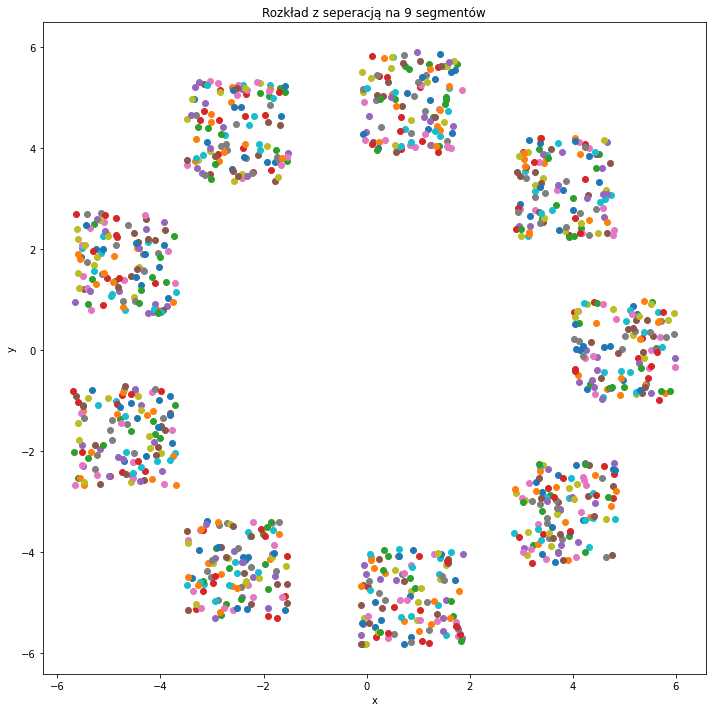

In [9]:
wyswietl_chmure( stworz_chmure("separacja", 1000)  , tytul="Rozkład z seperacją na 9 segmentów")


Teraz widzimy, że tworzenie "chmury" jest poprawne.


Zaimplementuję teraz własne wyżarzanie.


Wybór funkcji temperatury znacząco wpływa na wyniki szacowania najkrótszej drogi.

Po paru iteracjach wybrałem funkcję podaną w dokumentacji `scipy.optimize.dual_annealing`:

$T_{q_{v}}(t) = T_{q_{v}}(1) \frac{2^{q_{v}-1} -1}{(1+t)^{q_{v}-1}-1}$

In [10]:
T_1 = 5230

In [11]:
def temperatura(t):
    q_v = 2.0

    return T_1 * ( 2**(q_v - 1) - 1 ) / ( ( 1 + t )**(q_v - 1) - 1)


In [12]:
def P(e, e_prim, T):
    if e_prim < e:
        return 1
    else:
        return np.exp( -(e_prim - e)/T )

def energia_stanu(stan):
    dlugosc_sciezki = 0

    for id_miasta in range(len(stan) - 1):
        aa = (stan[id_miasta][0] - stan[id_miasta+1][0]) * (stan[id_miasta][0] - stan[id_miasta+1][0])
        bb = (stan[id_miasta][1] - stan[id_miasta+1][1]) * (stan[id_miasta][1] - stan[id_miasta+1][1])
        dlugosc_sciezki += np.sqrt( aa + bb )

    return dlugosc_sciezki

Energia stanu w przypadku prolemu komiwojażera to jest długość ścieżki, więc tutaj liczę sumę odległości punktów w ścieżce.


Teraz w samej funkcji wyżarzania implementuję dwie opcje:
 "arbitrary swap"(zamiana dwóch losowych miast) i "consecutive swap"(zamiana dwóch losowych, ale sąsiednich miast).


In [13]:
def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000):
    obecny_stan = startowa_sciezka

    for k in range(k_max):
        stan_iteracji = obecny_stan.copy()
        T = temperatura( k+1 )

        if zmiana=="arbitrary swap":
            indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

            indeks_drugiego_miasta = indeks_pierwszego_miasta
            while(indeks_drugiego_miasta == indeks_pierwszego_miasta):
                indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]
            
            
        elif zmiana=="consecutive swap":
            indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)
            
            if(np.random.uniform(0.0,1.0,1) > 0.5):
                indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
            else:
                indeks_drugiego_miasta = indeks_pierwszego_miasta - 1
                
            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]
            
            
        else:
            print("Blad")
            return 0
        

        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= np.random.uniform(0.0, 1.0, 1):
            obecny_stan = stan_iteracji

    return obecny_stan


Teraz brakuje nam jedynie funkcji rysującej samą ścieżkę:

In [14]:
def wyswietl_sciezke(chmura, tytul="Sciezka punktów", dlugosc=-1):
    fig1, axis = plt.subplots(figsize=(10,10))

    if dlugosc==-1:
        axis.set_title(tytul)
    else:
        axis.set_title(tytul + " | Długość: " + str(dlugosc))
    axis.set_xlabel("x")
    axis.set_ylabel("y")


    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])
    chmura=np.array(chmura)
    axis.plot(chmura[:,0], chmura[:,1])

    fig1.tight_layout()
    fig1.show()

Przechodzę do testów.


In [15]:
temp_w = 100
temp_k = 10000

#### Rozkład jednostajny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


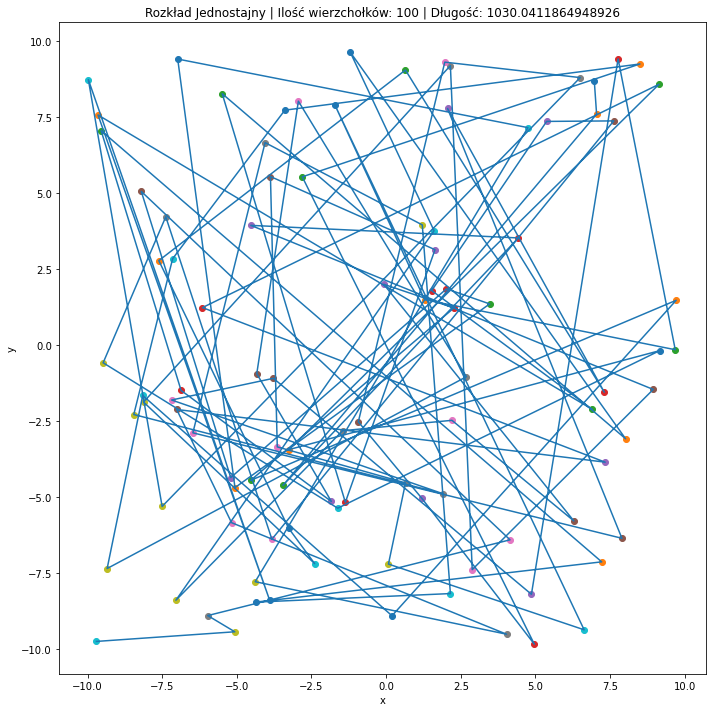

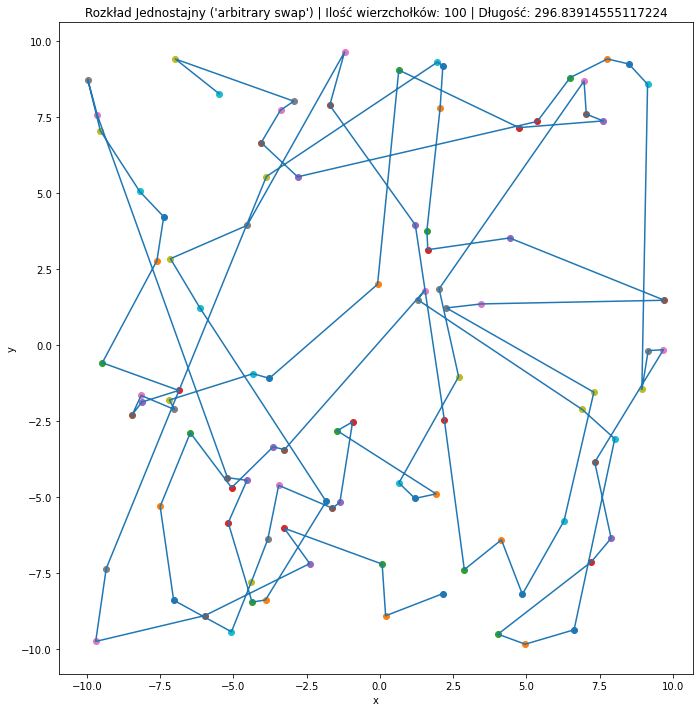

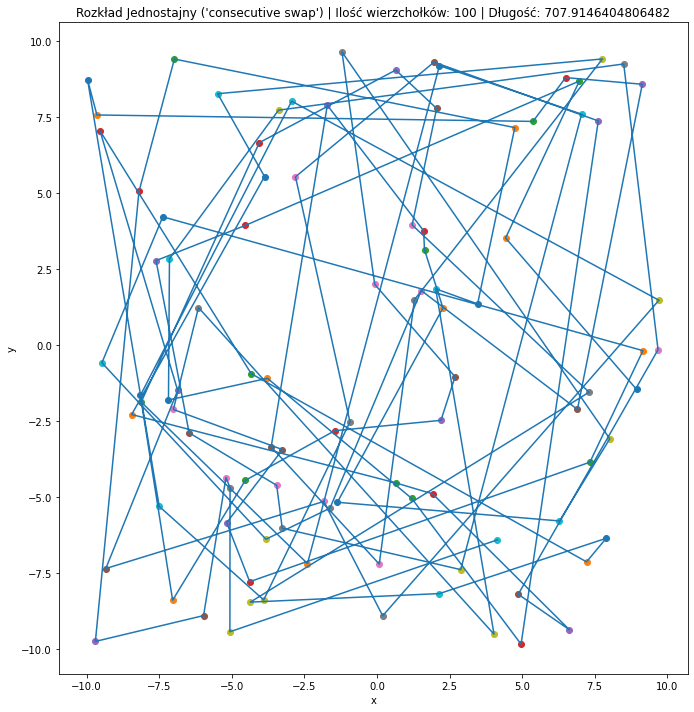

In [16]:
temp_rozklad = "Rozkład Jednostajny"

chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład normalny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


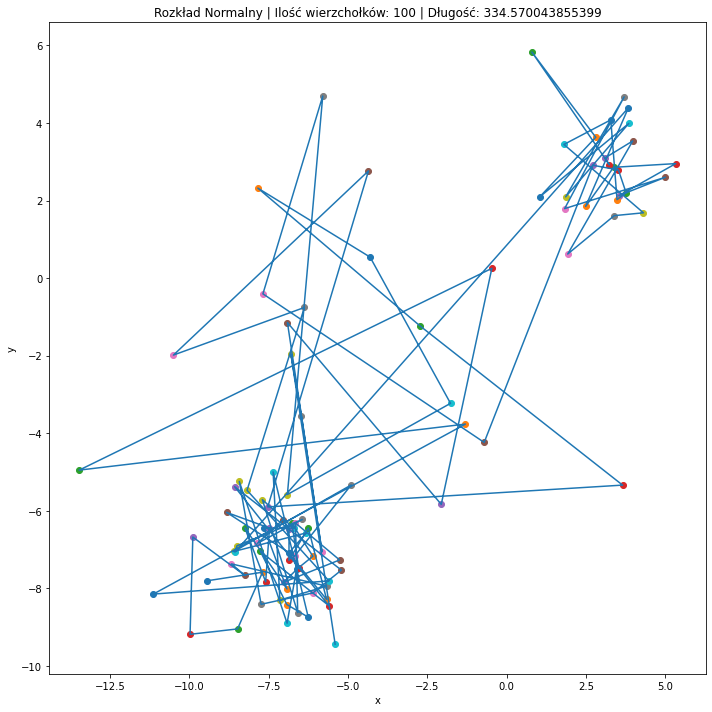

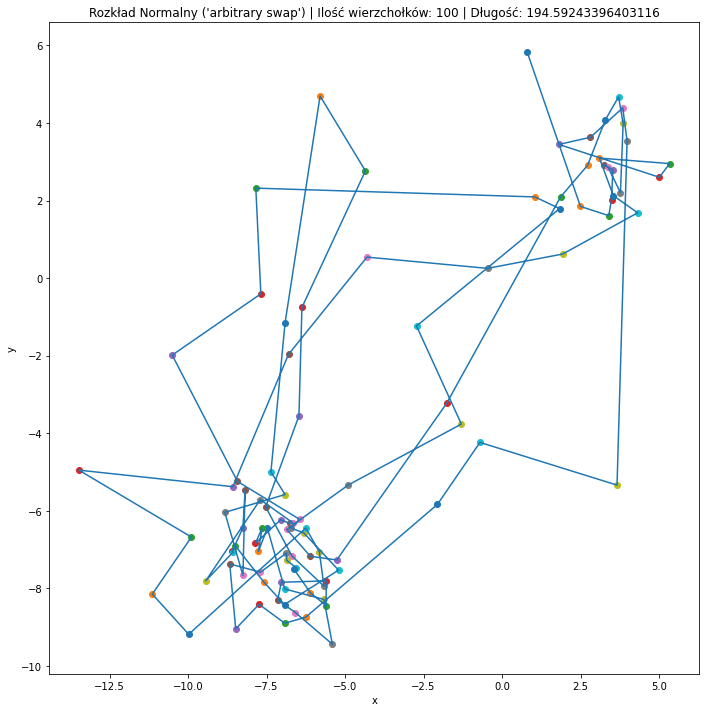

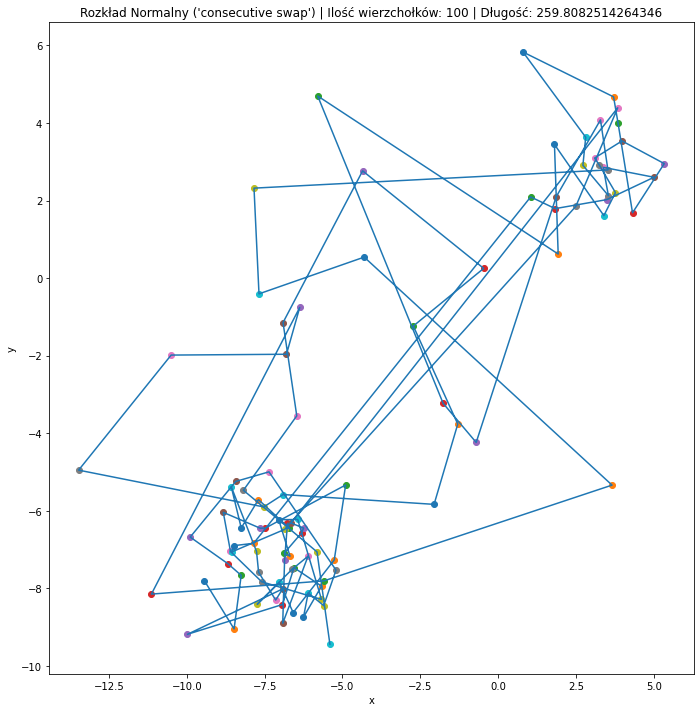

In [17]:
temp_rozklad = "Rozkład Normalny"

chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład z podziałem na 9 segmentów

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


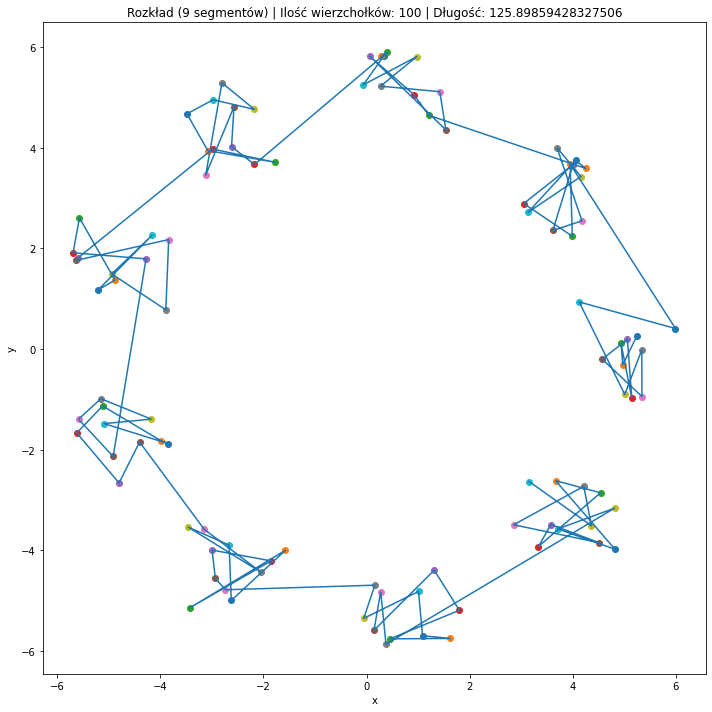

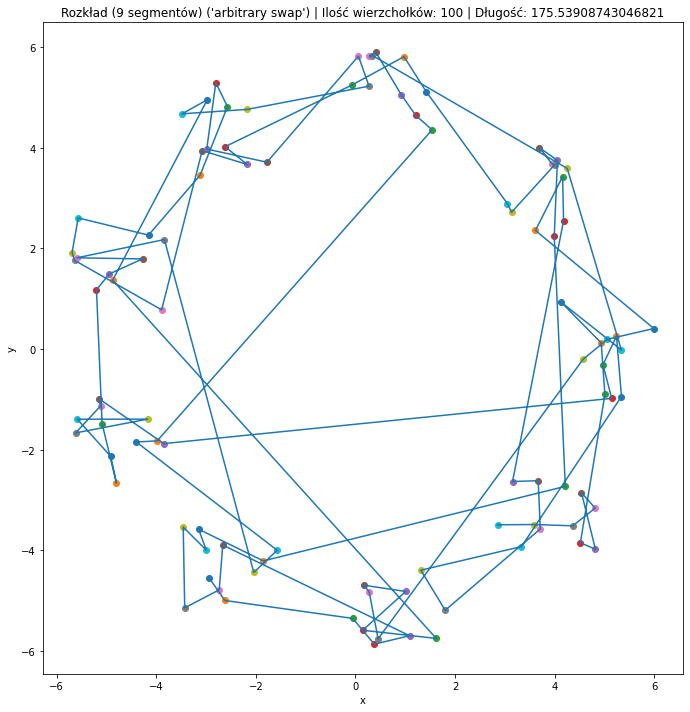

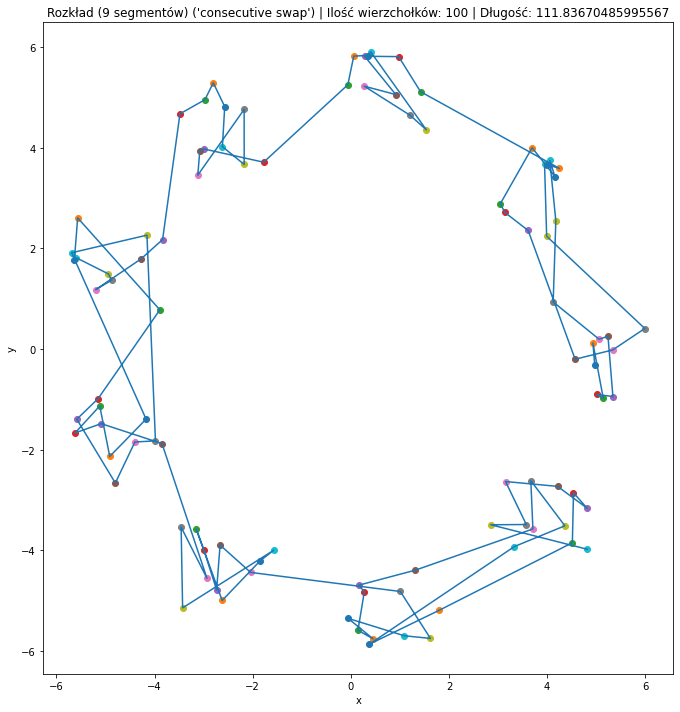

In [18]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


Wyniki nie są do końca zadowalające. W przypadku rozkładu z podziałem na 9 zdarza się, że "krótsza ścieżka" jest dłuższa od tej pierwszej!

Temperatura jednak była ustawiona na 5230.

Wykonam testy ponownie, dla zmniejszonej wartości początkowej temperatury.

In [19]:
T_1 = 52

#### Rozkład jednostajny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


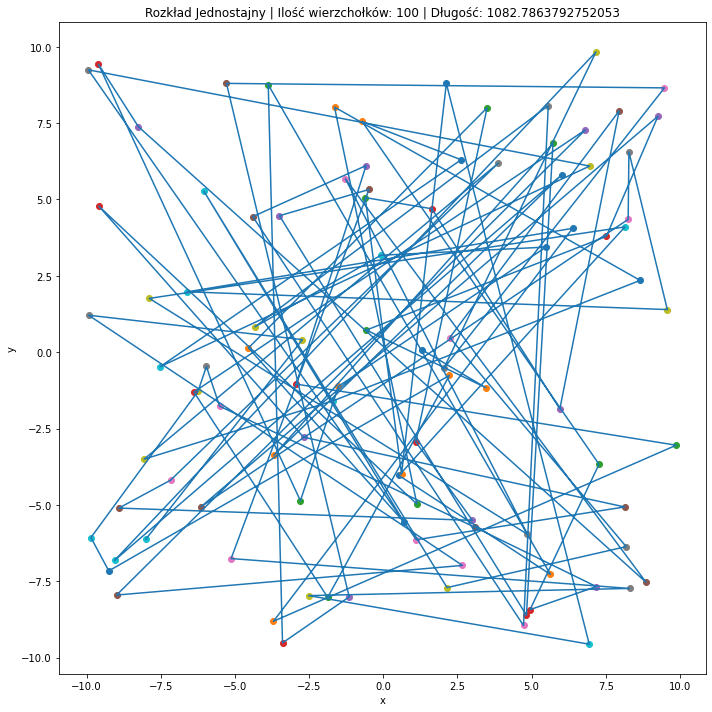

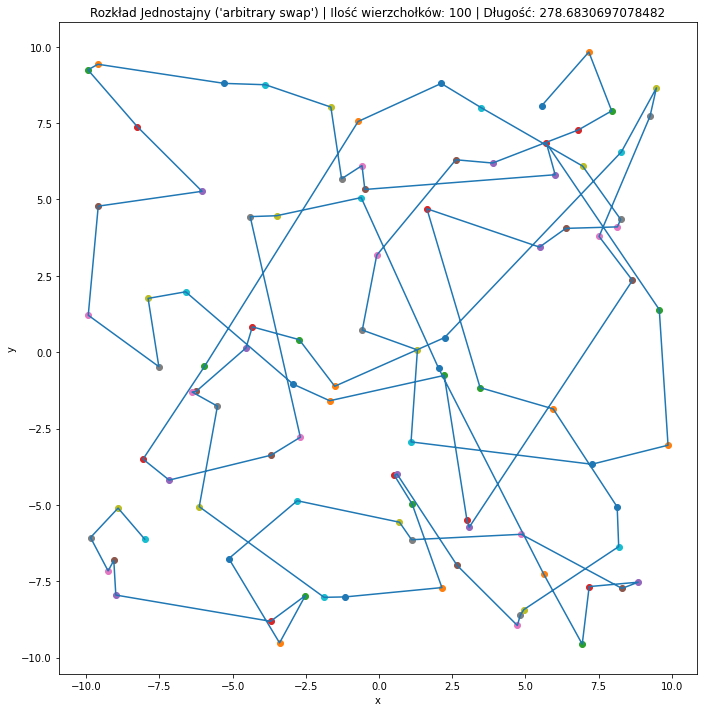

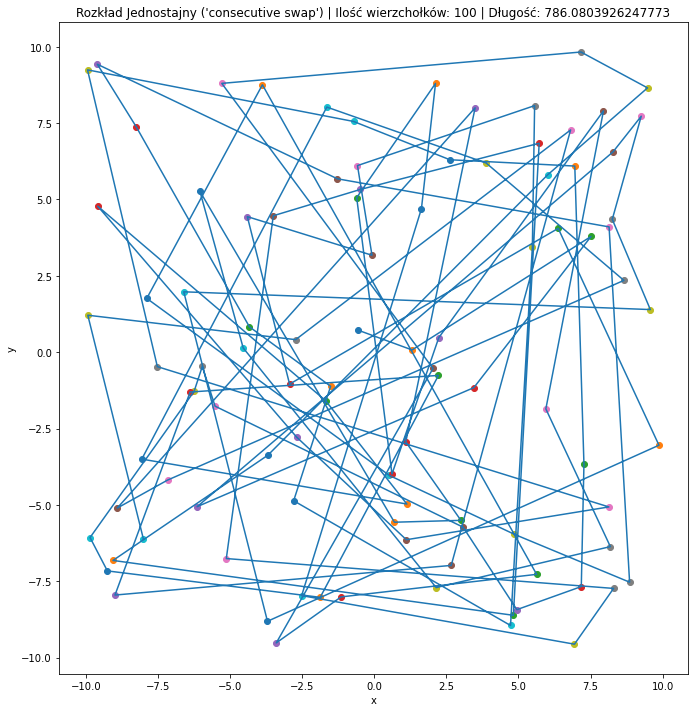

In [20]:
temp_rozklad = "Rozkład Jednostajny"

chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład normalny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


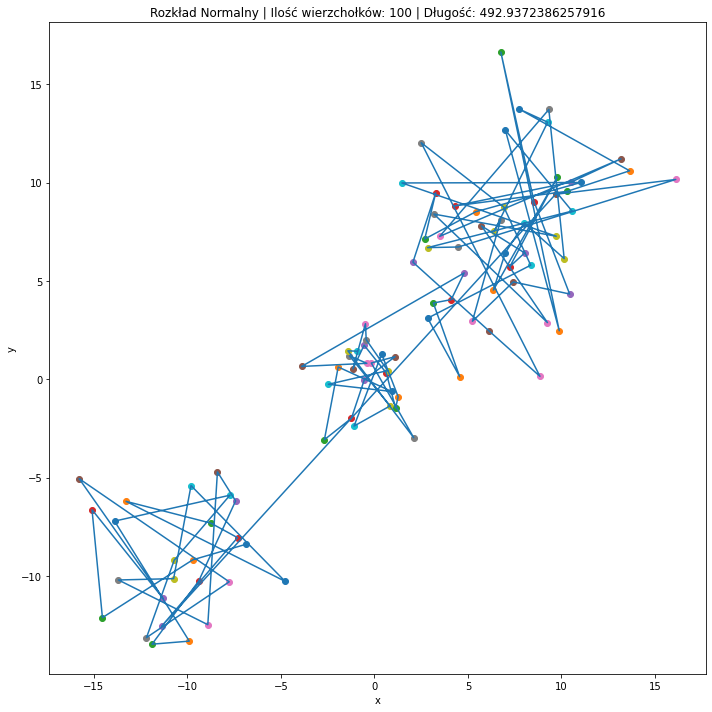

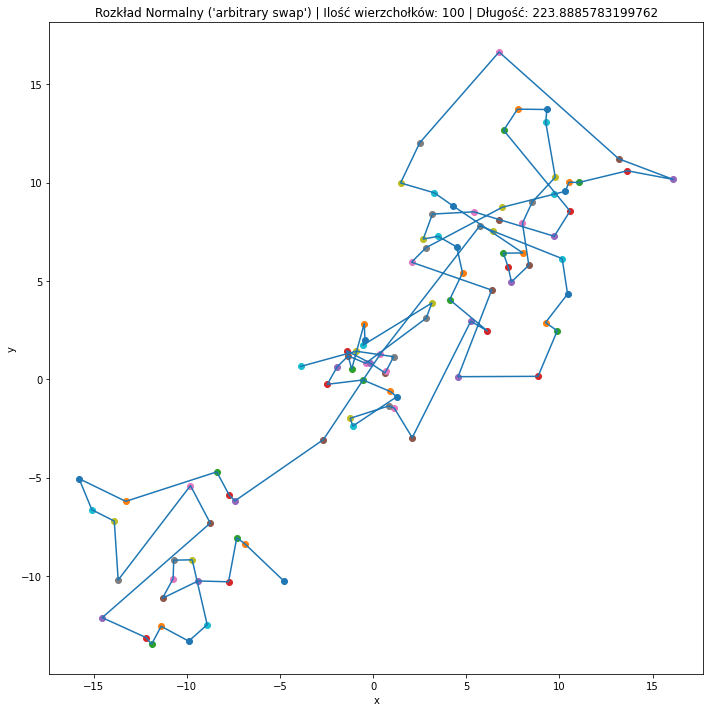

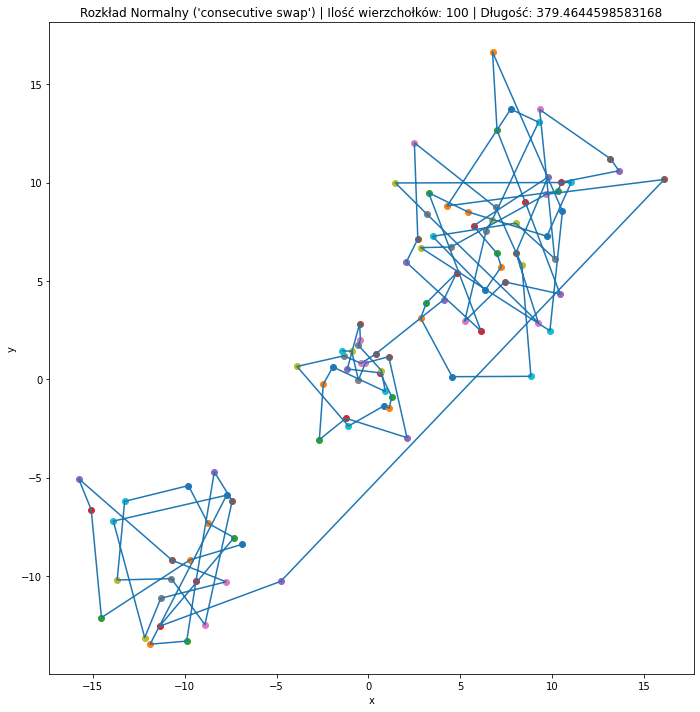

In [21]:
temp_rozklad = "Rozkład Normalny"

chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład z podziałem na 9 segmentów

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


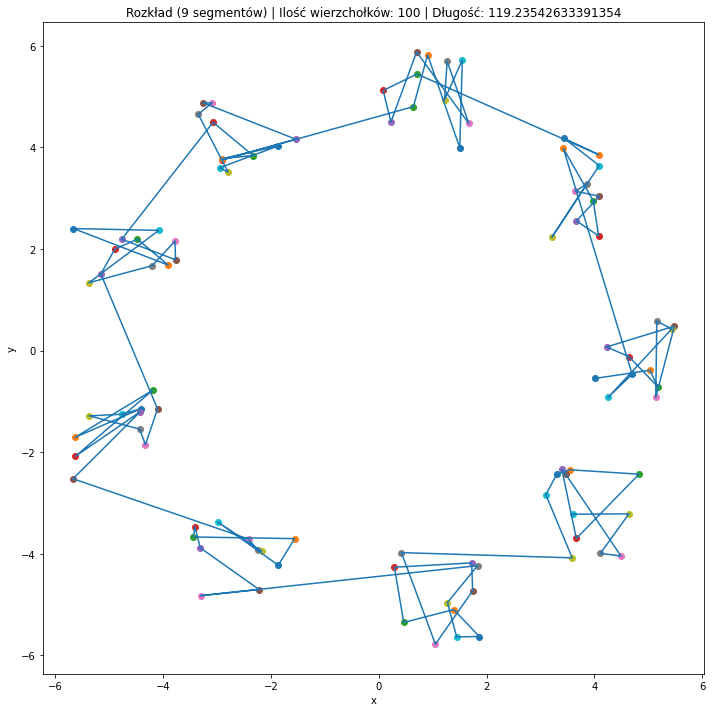

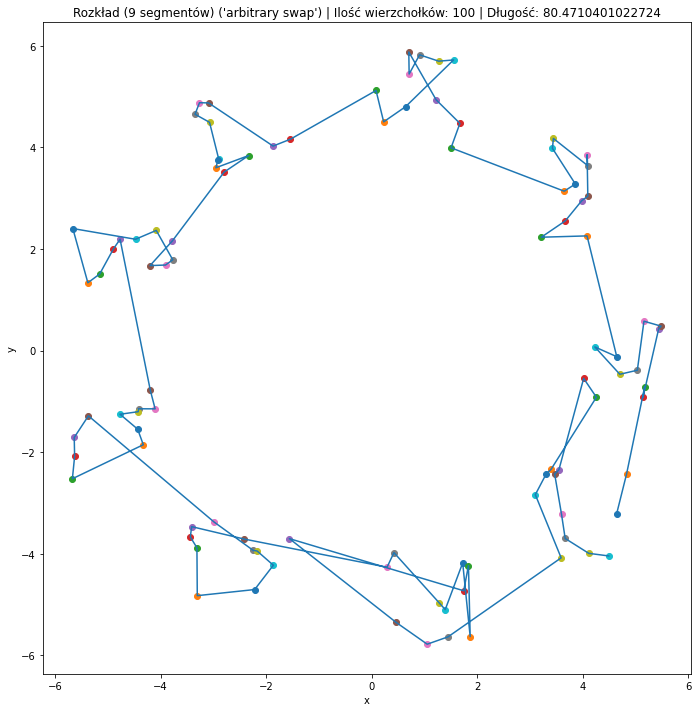

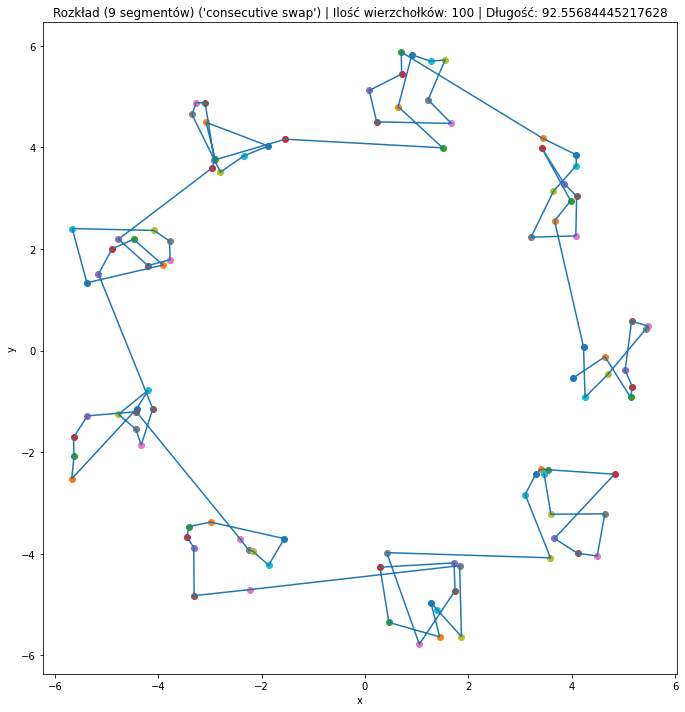

In [22]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


Te wyniki dla niższej temperatury są już dużo bardziej zadowalające.

Powodem takiej zmiany jest fakt, że funkcja prawdopodobieństwa w dużej mierze zależy od podanej temperatury.
Im wolniej zmienia się temperatura, tym większa szansa, że znalezione rozwiązanie będzie optymalne.
(źródło: Wikipedia - [link](https://en.wikipedia.org/wiki/Simulated_annealing#The_annealing_schedule)).

W kwestii `arbitrary swap` vs `consecutive swap` - w moich testach zawsze ten pierwszy zdawał się dawać lepsze rezultaty.

Ten drugi ma potencjał w sytuacjach takich jak podział na 9 segmentów,
gdzie losowe dobieranie dwóch miast, które najprawdopodobniej są mocno od siebie oddalone bardzo rzadko skutkować będzie polepszeniem stanu.

Dla 100 wierzchołków nie jest lepszy, ale jak spróbuję dla większej ilości:

In [23]:
temp_w = 1000
temp_k = 10000

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


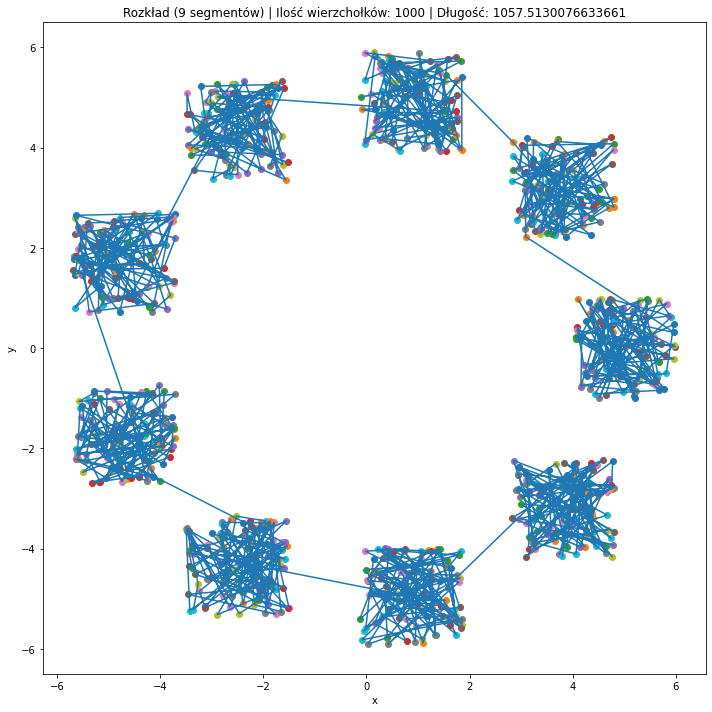

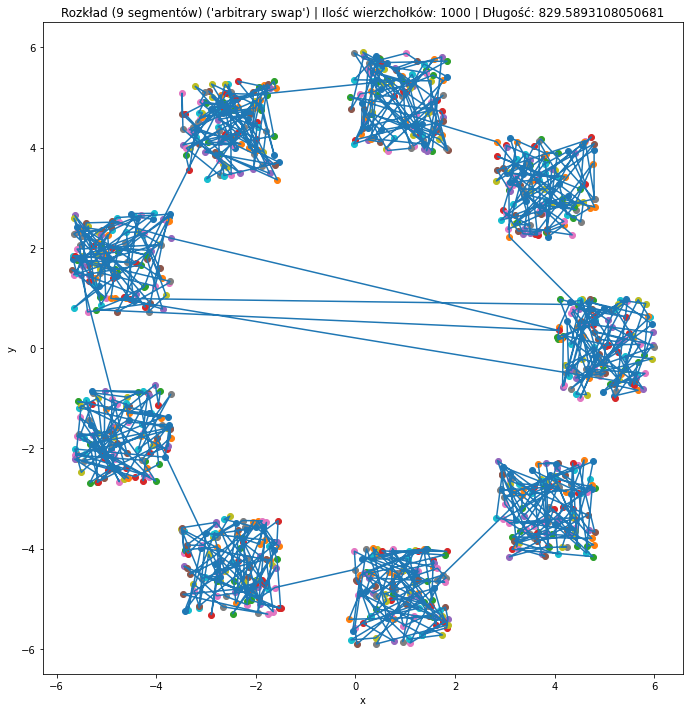

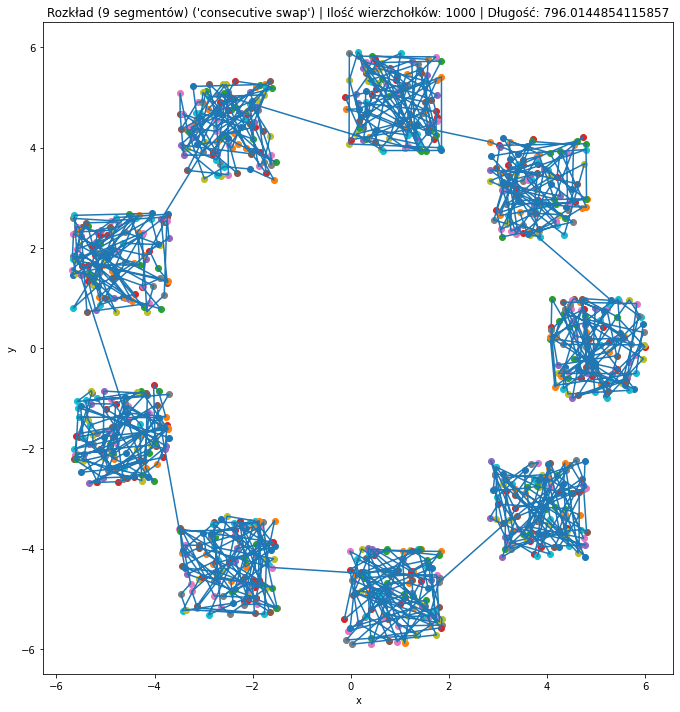

In [24]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

Sytuacja znacząco się zmieniła (na korzyść `consecutive swap`), choć moim zdaniem połączenie `arbitrary swap` i `consecutive swap`:

` losuj dwa punkty, ale nie bardzo daleko oddalone od siebie  `

działałoby tutaj lepiej.

Do wizualizacji wykorzystam `matplotlib.animation`.

In [25]:
import matplotlib.animation as animation
from pylab import *
from IPython.display import Video

In [26]:
def wizualizuj(frames = 60, skala=2, fps=10, nazwa_pliku="demo1.mp4"):

    chmura_do_wizualizacji = stworz_chmure("rozklad_jednostajny", 100)

    fig1, axis = plt.subplots(figsize=(10.8,10.8))
    for punkt in chmura_do_wizualizacji:
        axis.scatter(punkt[0], punkt[1])

    temp_chmura = np.array( chmura_do_wizualizacji.copy() )
    linie, = axis.plot(temp_chmura[:,0], temp_chmura[:,1])

    def animate(frames, chmura_do_wizualizacji):
        nowa_chmura_do_wizualizacji = simulatedAnnealing(chmura_do_wizualizacji, zmiana="arbitrary swap", k_max=skala)
        for i in range(len(chmura_do_wizualizacji)):
            chmura_do_wizualizacji[i] = nowa_chmura_do_wizualizacji[i]

        axis.set_title("Rozkład Jednostajny | Wierzchołki: 100 | Długość: " + str(round(energia_stanu(nowa_chmura_do_wizualizacji), 2)))
        axis.set_xlabel("x")
        axis.set_ylabel("y")

        axis.set_xlim(-10,10)
        axis.set_ylim(-10,10)

        temp_chmura = np.array( nowa_chmura_do_wizualizacji.copy() )
        linie.set_data(temp_chmura[:,0], temp_chmura[:,1])
        return linie



    ani = animation.FuncAnimation(fig1, animate, frames, fargs=[chmura_do_wizualizacji], interval=30)
    writer = animation.writers['ffmpeg'](fps=fps)
    ani.save(nazwa_pliku, writer=writer)



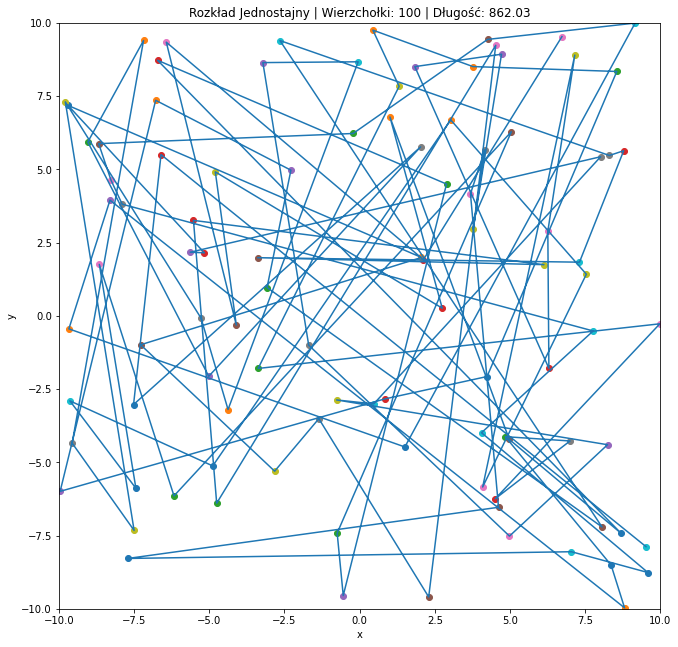

In [27]:
wizualizuj(frames=1000, skala=10, fps=60)

#ilośc iteracji to frames * skala

In [28]:
Video("demo1.mp4")

Widzimy, że przez "losowość" funkcji prawdopodobieństwa często zmieniamy "dobre" rozwiązanie na gorsze.

Mogę ustawić program tak, żeby akceptował jedynie lepsze rozwiązania: (zmiana w porównaniu $P(e, e', T)$)

In [29]:
def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000):
    obecny_stan = startowa_sciezka

    for k in range(k_max):
        stan_iteracji = obecny_stan.copy()
        T = temperatura( k+1 )

        if zmiana=="arbitrary swap":
            indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

            indeks_drugiego_miasta = indeks_pierwszego_miasta
            while(indeks_drugiego_miasta == indeks_pierwszego_miasta):
                indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]


        elif zmiana=="consecutive swap":
            indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)

            if(np.random.uniform(0.0,1.0,1) > 0.5):
                indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
            else:
                indeks_drugiego_miasta = indeks_pierwszego_miasta - 1

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]


        else:
            print("Blad")
            return 0


        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= 1:     ## << zmiana tutaj <<
            obecny_stan = stan_iteracji

    return obecny_stan

Pokażę teraz wizualizację po zmianie:

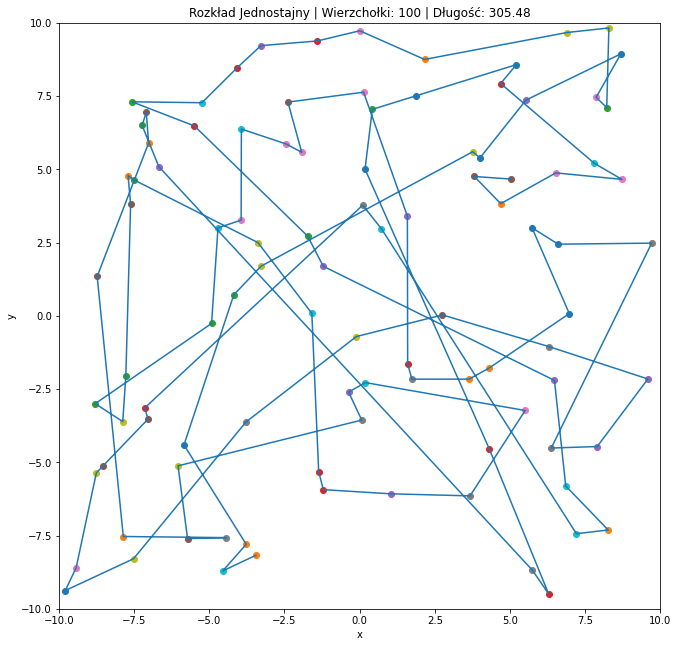

In [30]:
wizualizuj(frames=1000, skala=10, fps=60, nazwa_pliku="demo2.mp4")

In [31]:
Video("demo2.mp4")


Sam wybór tego parametru w tym porównaniu jest dość problematyczny - w zależności od zadania różne wartości dają różne rezultaty.

Generacja nowego stanu też może być przeprowadzona na wiele sposobów - tutaj wykonuję pojedynczą zamianę miast, ale mógłbym również wykonywać ich więcej.

Nie jest to część polecenia, ale przeprowadzę zmiany, które uważam, że mogą poprawić generacje.

In [ ]:
def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000):
    obecny_stan = startowa_sciezka
    ilosc_zmian = 4

    for k in range(k_max):
        stan_iteracji = obecny_stan.copy()
        T = temperatura( k+1 )

        if zmiana=="arbitrary swap":
            for i in range(ilosc_zmian):            ##
                indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

                indeks_drugiego_miasta = indeks_pierwszego_miasta
                while(indeks_drugiego_miasta == indeks_pierwszego_miasta):
                    indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))

                stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]


        elif zmiana=="consecutive swap":
            for i in range(ilosc_zmian):            ##
                indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)

                if(np.random.uniform(0.0,1.0,1) > 0.5):
                    indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
                else:
                    indeks_drugiego_miasta = indeks_pierwszego_miasta - 1

                stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]


        else:
            print("Blad")
            return 0


        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= np.random.uniform(0.75, 1.0, 1):   ##
            obecny_stan = stan_iteracji

    return obecny_stan

In [ ]:
T_1 = 10

In [ ]:
wizualizuj(frames=1000, skala=10, fps=60, nazwa_pliku="demo3.mp4")

In [ ]:
Video("demo3.mp4")

